<a href="https://colab.research.google.com/github/abdoufermat5/image-processing-in-python/blob/main/TP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exo 1 Traitement d'image avec OpenCV
Après avoir importé le module opencv (NB: pour chaque question, afficher l’image originale et les images résultants des transformation et puis interpréter les résultats obtenus)



1.   **Changement d'espaces de couleur**: tester sur une images les fonctions de changement d’espace de représentation des couleurs (cv.cvtColor(), cv.inRange(), cv.COLOR_BGR2GRAY , cv.COLOR_BGR2HSV ).


In [1]:
%cd drive/MyDrive/DIC2-IMAGE\ PROCESSING/data

/content/drive/MyDrive/DIC2-IMAGE PROCESSING/data






>IMPORTS





In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from google.colab.patches import cv2_imshow

In [3]:
# utilitaire
def set_size(w,h, ax=None):
    """ fonction pour agrandir la taille de la fenetre d'affichage"""
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

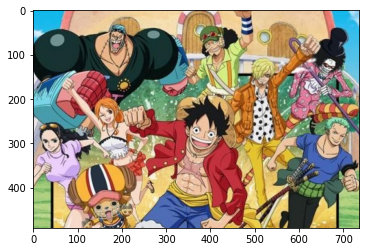

In [5]:
img_ = cv.imread("onepiece.jpg")
img = cv.cvtColor(img_, cv.COLOR_BGR2RGB)
plt.imshow(img)



> En utilisant **cvtColor()**



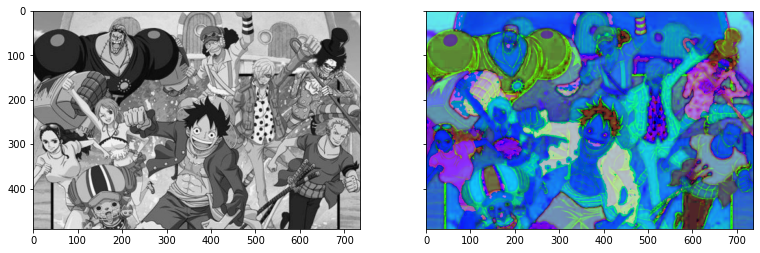

In [6]:
img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
img_HSV = cv.cvtColor(img, cv.COLOR_RGB2HSV)
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)
ax[0].imshow(img_gray, cmap="gray")
ax[1].imshow(img_HSV, cmap="gray")
set_size(10, 10)



> **inRange()**



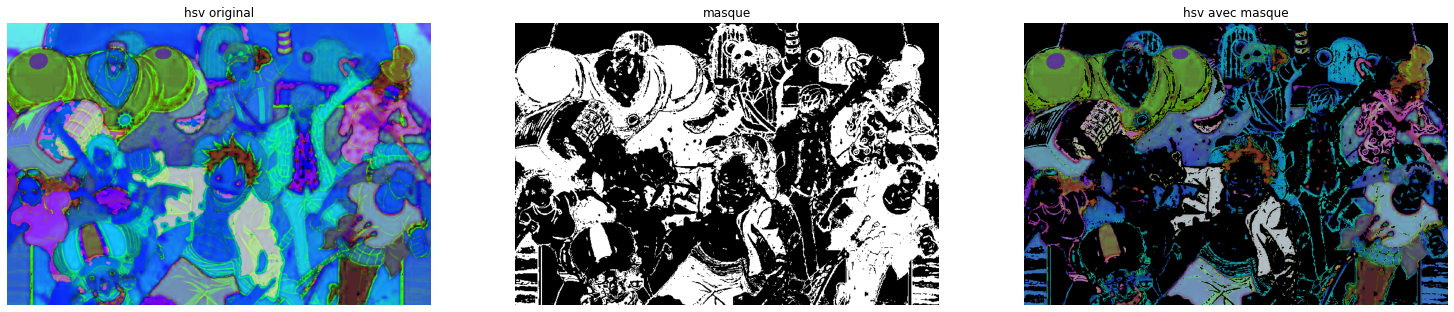

In [11]:
lower_blue = np.array([15,25,15])
upper_blue = np.array([200,200,200])
# Threshold the HSV image to get only blue colors
mask_blue = cv.inRange(img_HSV, lower_blue, upper_blue)
img_hsv_mask = cv.bitwise_or(img_HSV, img_HSV, mask=mask_blue)
fig, ax = plt.subplots(nrows=1, ncols=3)
ax[0].imshow(img_HSV, cmap="hsv")
ax[0].axis("off")
ax[0].set_title("hsv original")
ax[1].imshow(mask_blue, cmap="gray")
ax[1].set_title("masque")
ax[1].axis("off")
ax[2].imshow(img_hsv_mask, cmap="hsv")
ax[2].axis("off")
ax[2].set_title("hsv avec masque")

set_size(20, 10)



2.   **Transformations géométriques** : mettre en oeuvre sur une image les fonctions de Changement d’échelles, translation, rotation, transfor-
mation affine, perspective transformation.





> Changement d'echelle



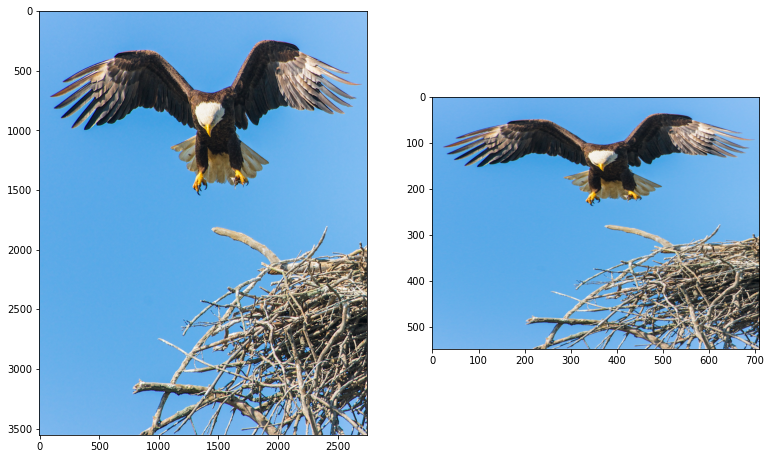

In [15]:
img = cv.imread("eagle_fly.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
w, h, c = img.shape
nouvelle_w, nouvelle_h = w//5, h//5
image_resized = cv.resize(img, (nouvelle_w, nouvelle_h), interpolation=cv.INTER_AREA)
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(img, cmap="gray")
ax[1].imshow(image_resized, cmap="gray")
set_size(10, 10)



> translation

En géométrie, une translation est une transformation géométrique qui correspond à l'idée intuitive de « glissement » d'un objet, sans rotation, retournement ni déformation de cet objet.


---


nous allons en premier coder une fonction de translation avant d'utiliser la fonction native de opencv **warpAffine**

In [16]:
def translate(img, u, v, sens="desc"):
  n_img = np.zeros(img.shape, dtype=np.uint8)
  h, w = img.shape[:2]
  if sens == "desc":
    for i in range(h):
      for j in range(w):
        if i > u and j > v:
          n_img[i, j] = img[i-u, j-v]
        else:
          n_img[i, j] = np.random.randint(200, 255)
  else:
    for i in range(h):
      for j in range(w):
        if i < h-u and j < w-v:
          n_img[i, j] = img[i+u, j+v]
        else:
          n_img[i, j] = np.random.randint(200, 255)
  return n_img

CPU times: user 2.52 s, sys: 4.91 ms, total: 2.52 s
Wall time: 2.52 s


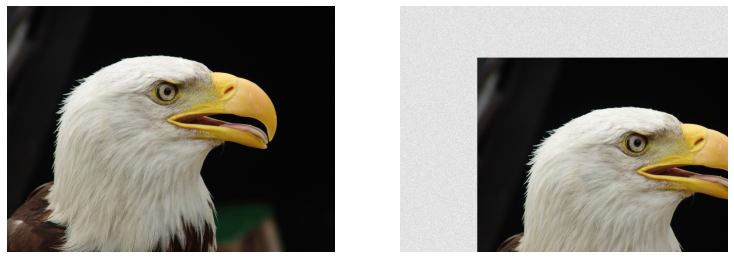

In [21]:
%%time
img = cv.imread("eagle.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

u, v = 200, 300
img_translated = translate(img, u, v)
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(img, cmap="gray")
ax[0].axis("off")
ax[1].imshow(img_translated, cmap="gray")
ax[1].axis("off")
set_size(10, 10) 

CPU times: user 2.55 s, sys: 4.99 ms, total: 2.56 s
Wall time: 2.56 s


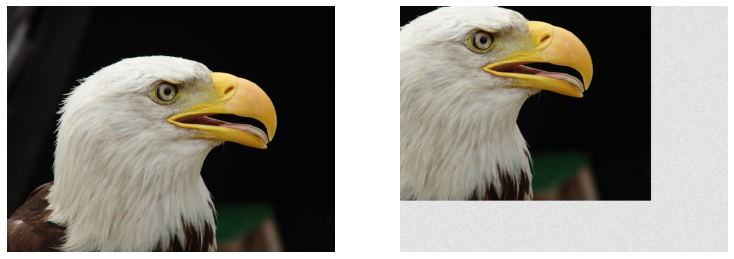

In [20]:
%%time
img = cv.imread("eagle.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

u, v = 200, 300
img_translated = translate(img, u, v, "asc")
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(img, cmap="gray")
ax[0].axis("off")
ax[1].imshow(img_translated, cmap="gray")
ax[1].axis("off")
set_size(10, 10)



avec **warpAffine()**

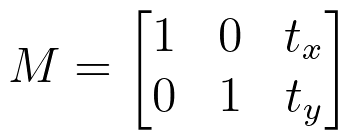


CPU times: user 74.6 ms, sys: 922 µs, total: 75.5 ms
Wall time: 68.9 ms


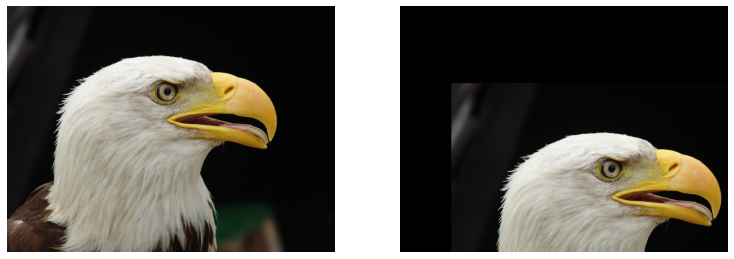

In [24]:
%%time
M1 = np.float32([[1, 0, u],
                [0, 1, v]])
img_translated = cv.warpAffine(img, M1, img.shape[:2][::-1])
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(img, cmap="gray")
ax[0].axis("off")
ax[1].imshow(img_translated, cmap="gray")
ax[1].axis("off")
set_size(10, 10)

CPU times: user 65.6 ms, sys: 1.96 ms, total: 67.5 ms
Wall time: 67.9 ms


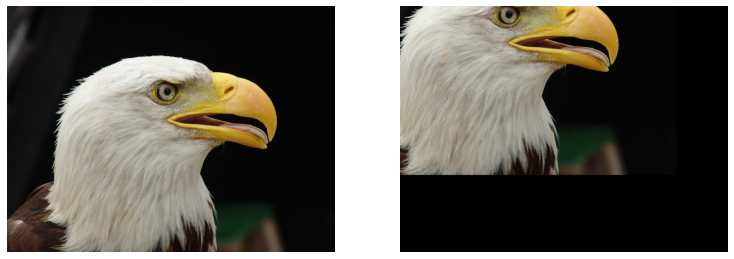

In [27]:
%%time
M2 = np.float32([[1, 0, -u],
                [0, 1, -v]])
img_translated = cv.warpAffine(img, M2, img.shape[:2][::-1])
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(img, cmap="gray")
ax[0].axis("off")
ax[1].imshow(img_translated, cmap="gray")
ax[1].axis("off")
set_size(10, 10)



> Rotation

En géométrie dans le plan, une rotation plane est une transformation qui fait tourner les figures autour d'un point et d'un certain angle. Cette transformation est une isométrie car les distances sont conservées. La figure n'a été ni déformée, ni agrandie.

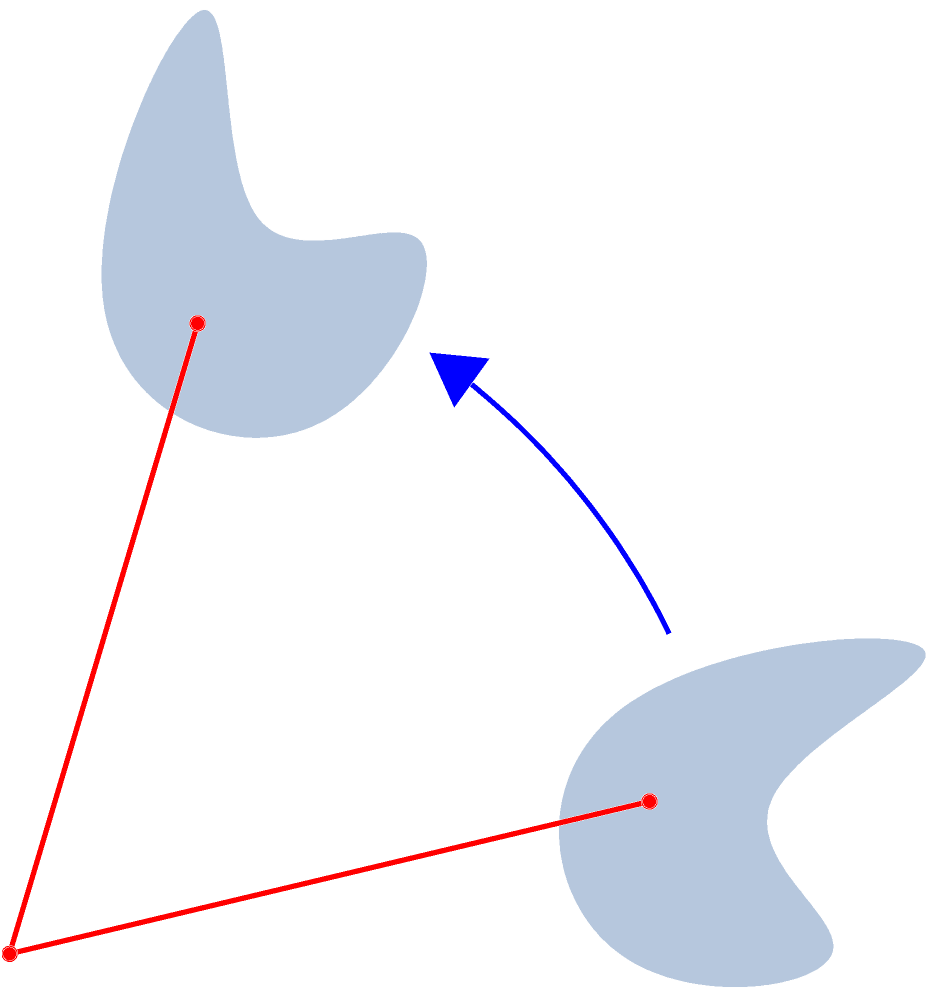


il existe plusieurs fonction de rotation

In [31]:
img = cv.imread("eagle_fly.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_rotated = cv.rotate(img, cv.ROTATE_90_CLOCKWISE)
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(img, cmap="gray")
ax[0].axis("off")
ax[1].imshow(img_rotated, cmap="gray")
ax[1].axis("off")
set_size(10, 10)



> transformation affine

Une **fonction affine** est une fonction d'une variable réelle de la forme ${\displaystyle x\mapsto ax+b}$ avec a et b réels. La somme et la composée de deux fonctions affines est une fonction affine.

Une **transformation affine** est une application affine bijective d'un espace dans lui-même. Cette notion généralise celle de fonction affine de ℝ dans ℝ sous la forme ${\displaystyle X\mapsto A({\overrightarrow {OX}})+B}$, où ${\displaystyle A}$ est une application linéaire et ${\displaystyle B}$ est un point

> **EXEMPLE**

* Les [translations](https://fr.wikipedia.org/wiki/Translation_(g%C3%A9om%C3%A9trie)) (caractérisation : partie linéaire = l'identité) ;
* Les [symétries centrales](https://fr.wikipedia.org/wiki/Sym%C3%A9trie) (caractérisation : partie linéaire = moins l'identité) ;
* Plus généralement, les [homothéties](https://fr.wikipedia.org/wiki/Homoth%C3%A9tie) affines (caractérisation : partie linéaire = une homothétie vectorielle, uniquement dans le cas d'un rapport différent de 1) ;
* Les [symétries](https://fr.wikipedia.org/wiki/Sym%C3%A9trie) affines (caractérisation : au moins un point fixe et partie linéaire = une involution, ou application affine de carré égal à l'identité) ;
* Les [projections affines](https://fr.wikipedia.org/wiki/Projection_affine) (caractérisation : au moins un point fixe et partie linéaire = un projecteur, ou application affine de carré égal à elle-même) ;
* Les [affinités](https://fr.wikipedia.org/wiki/Affinit%C3%A9_(math%C3%A9matiques)), comprenant toutes les précédentes ;
* [Les transvections](https://fr.wikipedia.org/wiki/Transvection);
* Dans le cas euclidien : les isométries et similitudes.


In [ ]:
img = cv.imread("eagle_fly.jpg", cv.COLOR_BGR2RGB)
n, m, c = img.shape
coord_pt_img = np.float32([[50,50], [200, 50], [50, 250]])
coord_pt_img_aff = np.float32([[10, 100], [200, 50], [70, 250]])
M = cv.getAffineTransform(coord_pt_img, coord_pt_img_aff)
img_aff = cv.warpAffine(img, M, (m, n))
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(img)
ax[0].set_title("image originale", fontsize=30)
ax[0].axis("off")
ax[1].imshow(img_aff)
ax[1].set_title("image après transformation", fontsize=30)
ax[1].axis("off")
set_size(20, 10)